# Multivariate Analysis Example 1

 

In [1]:
# Read the body dimensions data 
download.file("http://www.openintro.org/stat/data/bdims.RData", destfile = "bdims.RData")
load("bdims.RData")

# reduce to 3 columns
lessData <- bdims[c("age","wgt","hgt")]

head(lessData, 20)

,age,wgt,hgt
,<int>,<dbl>,<dbl>
1,21,65.6,174.0
2,23,71.8,175.3
3,28,80.7,193.5
4,23,72.6,186.5
5,22,78.8,187.2
6,21,74.8,181.5
7,26,86.4,184.0
8,27,78.4,184.5
9,23,62.0,175.0


In [2]:
summary(lessData)

      age             wgt              hgt       
 Min.   :18.00   Min.   : 42.00   Min.   :147.2  
 1st Qu.:23.00   1st Qu.: 58.40   1st Qu.:163.8  
 Median :27.00   Median : 68.20   Median :170.3  
 Mean   :30.18   Mean   : 69.15   Mean   :171.1  
 3rd Qu.:36.00   3rd Qu.: 78.85   3rd Qu.:177.8  
 Max.   :67.00   Max.   :116.40   Max.   :198.1  

## Visual Exploration
In the next cell, we are going to look at some histograms using the ggplot2.qplot function.  
__Reference__: https://ggplot2.tidyverse.org/reference/qplot.html

Additionally, we are arranging some graphical objects (_grobs_) using the gridExtra package.  
__Reference__: https://cran.r-project.org/web/packages/gridExtra/vignettes/arrangeGrob.html


In [3]:
library(ggplot2) 
library(gridExtra) 


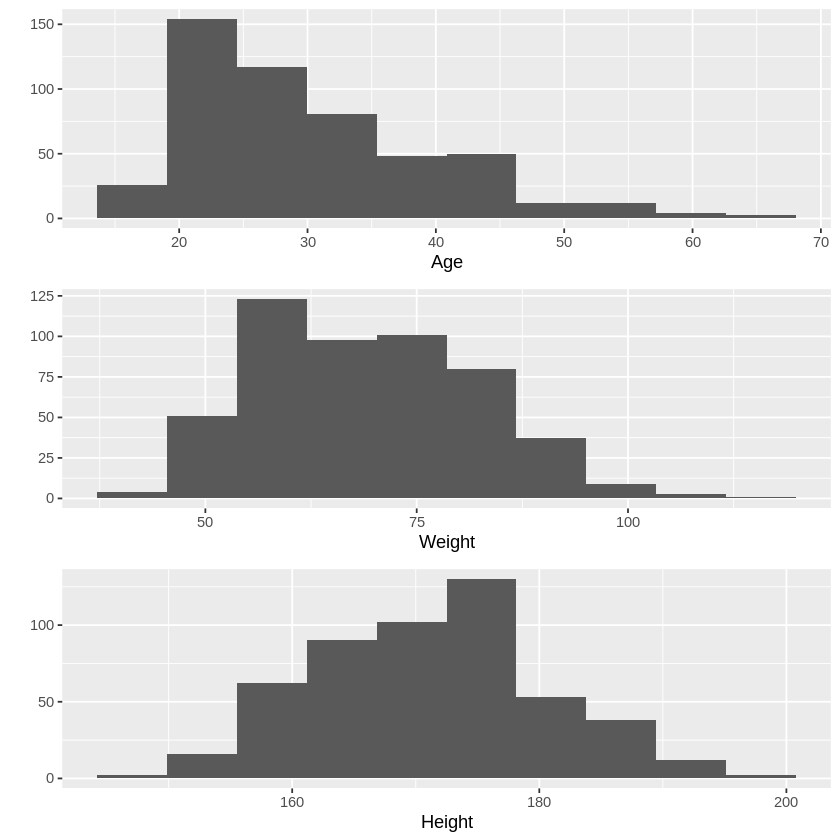

In [4]:

# Arrange three plots into 1 column
grid.arrange(
            # Plot the age variable, 
            #              # use only 10 bins/buckets to group the data 
        qplot(lessData$age,bins = 10,xlab='Age'),
            # wgt 
        qplot(lessData$wgt,bins = 10,xlab='Weight'),
            # hgt
        qplot(lessData$hgt,bins = 10,xlab='Height'),
        # describe the layout in number of rows and/or columns
        ncol=1)

## Moving up to Multiple Variables ... Multivariate

The next question for multivariate statistics is to attempt to understand if there are any relationships between variables.  
 * **Covariance** is the correlated dispersion of the two variables.
 * **Correlation** measures the relative growth rates of the two variables.

In [5]:
print("Weight and Height")
# cov( ) with two arguments treats them as two lists variable values 
paste("Cov(wgt, hgt) = ", cov(lessData$wgt, lessData$hgt))
cor(lessData$wgt, lessData$hgt)

print("Weight and Age")
paste("Cov(wgt, age) = ", cov(lessData$wgt, lessData$age))
cor(lessData$wgt, lessData$age)

print("Height and Age")
paste("Cov(hgt, age) = ", cov(lessData$hgt, lessData$age))
cor(lessData$hgt, lessData$age)

# Covariance Matrix
# just a data frame treats as multivariate data
cov(lessData)

# Correlation Matrix
cor(lessData)

[1] "Weight and Height"


[1] "Cov(wgt, hgt) =  90.0545152840471"

[1] 0.7173011

[1] "Weight and Age"


[1] "Cov(wgt, age) =  26.5781162538688"

[1] 0.2072652

[1] "Height and Age"


[1] "Cov(hgt, age) =  6.13591224828683"

[1] 0.06788349

,age,wgt,hgt
age,92.322739,26.57812,6.135912
wgt,26.578116,178.10938,90.054515
hgt,6.135912,90.05452,88.495510


,age,wgt,hgt
age,1.00000000,0.2072652,0.06788349
wgt,0.20726524,1.0000000,0.71730108
hgt,0.06788349,0.7173011,1.00000000


## Interpretting correlations

From above we see the following correlations:
 1. Weight and Height = 0.7173011
 2. Weight and Age = 0.2072652
 3. Height and Age = 0.06788349

These numbers tell us the following:
 1. There is a strong positive relationship between weight and height. Typically, the more a person weighs, the taller they are.
 2. There is a weak positive relationship between weight and age.
 3. There is little to no determination of height based on age. 
 
Regarding that last one... How can this be?  We all know that as someone grows up, they get taller!  
The reason our data does not have a strong height to age correlation is because the data covers adults, not children. 
So, presumably they have nearly completed growing.
 

__Positive correlation__, We expect a trend from lower left toward upper right if we plot the two variables against each other.

__Negative correlation__, We expect a trend from upper left toward lower right if we plot the two variables against each other.



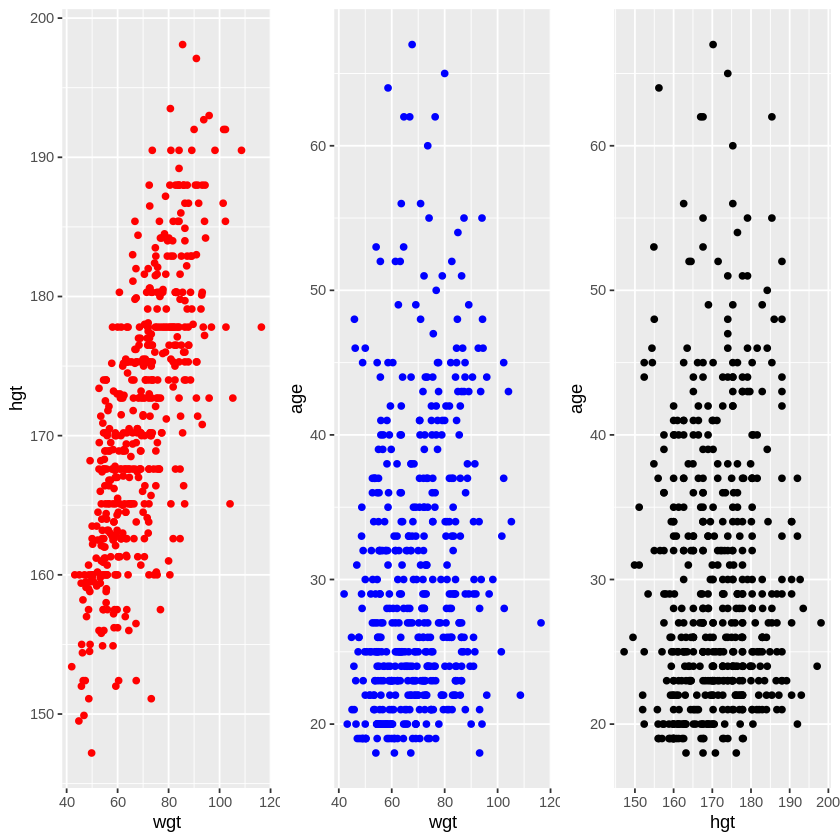

In [6]:
require(gridExtra)  # This provides the grid.arrange function
require(ggplot2)  # This provides the xyplot function

# Define our plots
   # Plot the Weight versus Height
wh <- ggplot(lessData, aes(x=wgt, y=hgt))
   # Plot the Weight versus Age, 
wa <- ggplot(lessData, aes(x=wgt, y=age))
   # Plot the Height versus Age, 
ha <- ggplot(lessData, aes(x=hgt, y=age))

# By assigning the plot to output, it is not visualized immediately.

# Arrange three plots into 1 column
grid.arrange(
        # Add our plots into the grid 
        #    # Add points for data to all our plots
        wh + geom_point(color="red"), 
        wa + geom_point(color="blue"), 
        ha + geom_point(),  # default color is black
        # describe the layout in number of rows and/or columns
        ncol=3)

## Use Case : Multiple Regression

Based on the exploration above and the discovered correlation of 0.72 between height and weight, we expect that we can use height to predict weight or weight to predict height.  This prediction is the concept of [linear regression](https://en.wikipedia.org/wiki/Linear_regression).

However, what if we want to use two variables to predict a third?  
Or even better, using 100's of variables to make a numerical prediction?

### Multiple Regression

Multiple Regression: Using two or more predictor (independent) variables to predict the value of a dependent variable.

__References__: http://onlinestatbook.com/2/regression/multiple_regression.html



#### Quetelet Index is kg/(m^2)
Since we have __wgt__ as _kg_ and __hgt__ as _cm_, we can compute this value and add it as a column to the data frame.

__Note:__ Conversion of _centimeters (cm)_ to _meters (m)_
```R
lessData$hgt/100
```

**Reference**: with() 
  * http://www.statmethods.net/stats/withby.html
  * http://rfunction.com/archives/2182


In [7]:
lessData$QueteletIndex <- with(lessData, lessData$wgt/(lessData$hgt/100)^2)
head(lessData)

,age,wgt,hgt,QueteletIndex
,<int>,<dbl>,<dbl>,<dbl>
1,21,65.6,174.0,21.66733
2,23,71.8,175.3,23.36472
3,28,80.7,193.5,21.55319
4,23,72.6,186.5,20.87272
5,22,78.8,187.2,22.48612
6,21,74.8,181.5,22.70640


### Multivariate Descriptive Statistics

mean, cov, and cor


In [8]:
summary(lessData)
cov(lessData)
cor(lessData)

      age             wgt              hgt        QueteletIndex  
 Min.   :18.00   Min.   : 42.00   Min.   :147.2   Min.   :16.88  
 1st Qu.:23.00   1st Qu.: 58.40   1st Qu.:163.8   1st Qu.:20.96  
 Median :27.00   Median : 68.20   Median :170.3   Median :23.16  
 Mean   :30.18   Mean   : 69.15   Mean   :171.1   Mean   :23.46  
 3rd Qu.:36.00   3rd Qu.: 78.85   3rd Qu.:177.8   3rd Qu.:25.47  
 Max.   :67.00   Max.   :116.40   Max.   :198.1   Max.   :38.19  

,age,wgt,hgt,QueteletIndex
age,92.322739,26.57812,6.135912,7.541478
wgt,26.578116,178.10938,90.054515,36.023441
hgt,6.135912,90.05452,88.495510,6.299680
QueteletIndex,7.541478,36.02344,6.299680,10.714224


,age,wgt,hgt,QueteletIndex
age,1.00000000,0.2072652,0.06788349,0.2397849
wgt,0.20726524,1.0000000,0.71730108,0.8246344
hgt,0.06788349,0.7173011,1.00000000,0.2045867
QueteletIndex,0.23978488,0.8246344,0.20458675,1.0000000


#### Strong Correlations?

 * We see that correlation between Weight and Height is 0.72
 * We see that correlation between Weight and Quetelet Index is 0.82.
  
Can we predict weight based on someone's Height and Quetelet Index?  We know we should be able to because:

$Quetelet Index = Weight / (Height^2)$  
$ => $  
$ Quetelet Index * (Height^2) = Weight $

**Lets test this with R!**

__Reference__: 
 * http://www.statmethods.net/stats/regression.html
 * https://www.r-bloggers.com/simple-linear-regression-2/


**Let's look at all the data just to confirm**

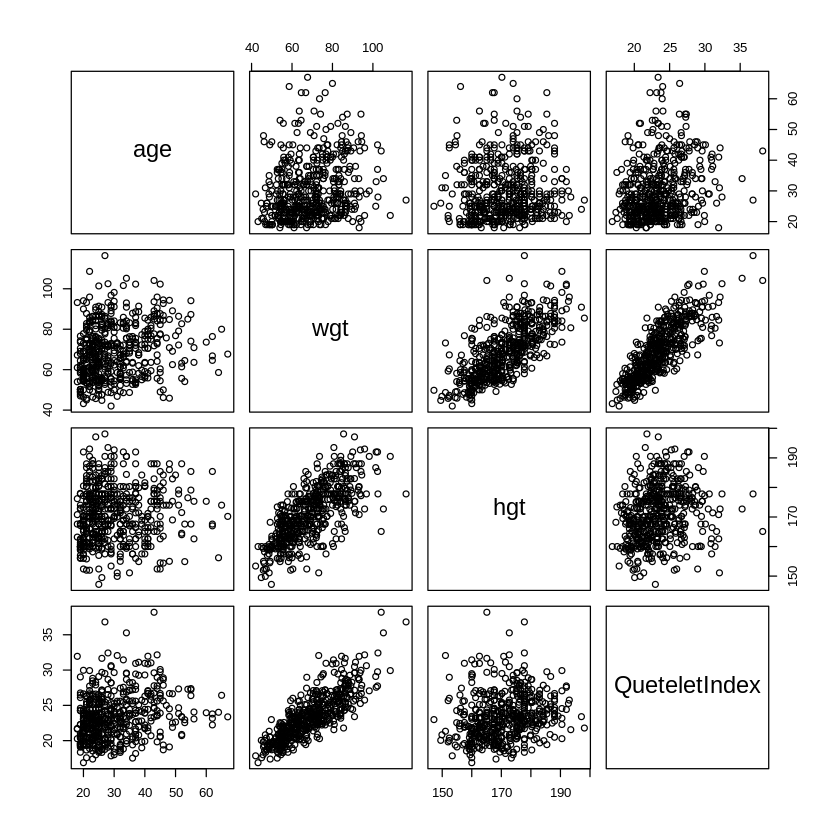

In [9]:
plot(lessData) # Plot a data frame... 


### Using linear model solver, _lm()_

lm function computes a linear regression
*  LHS ~ RHS is the model to compute.  
  *  Left-hand-side(LHS) is the dependent variable
  *  Right-hand-side(RHS) are the independent variables (predictors)

In [10]:
# fit variable will hold a statistical model
fit <- lm(wgt ~ hgt + QueteletIndex, data=lessData)

fit  # Show the model, e.g., coefficients computed.

summary(fit) # show results of analysis


Call:
lm(formula = wgt ~ hgt + QueteletIndex, data = lessData)

Coefficients:
  (Intercept)            hgt  QueteletIndex  
    -137.5505         0.8123         2.8846  



Call:
lm(formula = wgt ~ hgt + QueteletIndex, data = lessData)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4684 -0.5174 -0.2086  0.4846  5.0896 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -137.55047    0.84580  -162.6   <2e-16 ***
hgt              0.81227    0.00495   164.1   <2e-16 ***
QueteletIndex    2.88461    0.01422   202.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.025 on 504 degrees of freedom
Multiple R-squared:  0.9941,	Adjusted R-squared:  0.9941 
F-statistic: 4.262e+04 on 2 and 504 DF,  p-value: < 2.2e-16


**A key line above is the R-squared test**
```
Multiple R-squared:  0.9941,	Adjusted R-squared:  0.9941
```

From: https://en.wikipedia.org/wiki/Coefficient_of_determination  
**The R-Squared test measures the "proportion of the variance in the dependent variable that is predictable from the independent variable."**

Reviewing the solved model.
```
Coefficients:
  (Intercept)            hgt  QueteletIndex  
    -137.5505         0.8123         2.8846  
```
That implies that   
$wgt = 0.8123*hgt + 2.8846*QueteletIndex - 137.5505$

`geom_smooth()` using formula 'y ~ x'



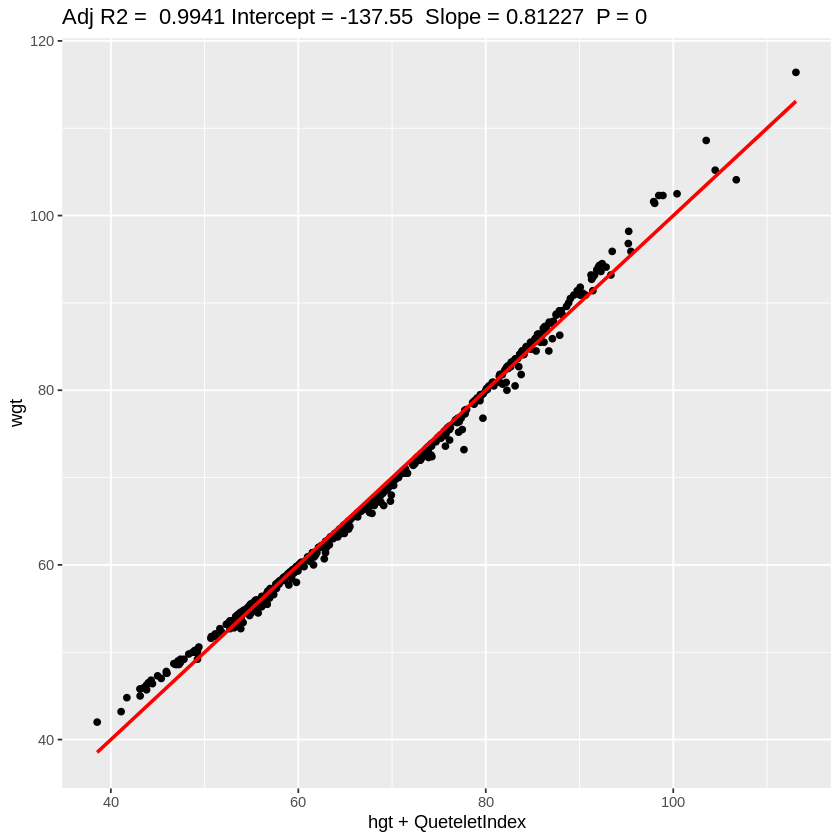

In [11]:
require(ggplot2)


ggplot(lessData, 
       aes_string(
                x = (0.8123*lessData$hgt + 2.8846*lessData$QueteletIndex - 137.5505), 
                y = names(fit$model)[1]
       ) # end of aes_string
  ) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)
                ) # end of title string concatenations
       , x = "hgt + QueteletIndex"
      ) 
